In [1]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

In [2]:
# fetch data 
college_data = pd.read_csv('College_subset_islr.csv')
college_data.head()

,id,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0,Auburn University-Main Campus,No,7548,6791,3070,25,57,16262,1716,6300,3933,600,1908,85,91,16.70,18,6642,69
1,1,Baylor University,Yes,6075,5349,2367,34,66,9919,484,6450,3920,600,1346,71,76,18.50,38,7503,72
2,2,Boston University,Yes,20192,13007,3810,45,80,14971,3113,18420,6810,475,1025,80,81,11.90,16,16836,72
3,3,Bowling Green State University,No,9251,7333,3076,14,45,13699,1213,7452,3352,600,1700,81,89,21.10,14,6918,67
4,4,Brigham Young University at Provo,Yes,7365,5402,4615,48,82,27378,1253,2340,3580,860,1220,76,76,20.50,40,7916,33


In [21]:
college_data.shape

(46, 20)

In [22]:
college_data = college_data.drop(columns = ['id','College','Private'])
college_data.shape

(46, 17)

In [23]:
college_data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00
mean,"8,494.98","5,016.00","2,142.41",51.30,75.67,"10,275.91","1,412.76","12,328.57","4,875.72",629.96,"1,560.76",87.59,90.65,13.09,24.83,"15,591.50",71.63
std,"4,878.91","3,435.81","1,447.82",26.27,20.22,"7,713.59","1,711.10","5,592.65","1,368.70",136.58,750.89,8.23,6.86,5.65,13.42,"10,658.50",20.10
min,"1,377.00",572.00,178.00,9.00,24.00,654.00,5.00,"2,340.00","2,655.00",350.00,300.00,71.00,75.00,2.90,6.00,"4,509.00",33.00
25%,"5,160.25","2,949.75","1,199.00",29.00,61.25,"4,453.50",247.50,"6,865.50","3,587.50",555.00,"1,042.50",81.25,87.00,8.42,14.00,"7,942.00",58.25
50%,"7,856.00","4,247.00","1,698.00",46.00,76.00,"8,130.00",787.00,"12,774.00","4,675.00",600.00,"1,348.00",88.00,91.50,12.50,21.00,"12,061.00",70.00
75%,"10,648.00","5,645.75","2,882.50",76.75,95.75,"13,653.75","1,715.75","17,568.75","6,052.50",692.50,"1,970.50",95.00,96.75,18.43,36.75,"19,708.50",93.75
max,"21,804.00","18,744.00","6,392.00",95.00,100.00,"31,643.00","9,054.00","19,840.00","7,270.00","1,230.00","3,450.00",100.00,100.00,23.10,52.00,"56,233.00",100.00


In [24]:
college_data.dtypes

Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

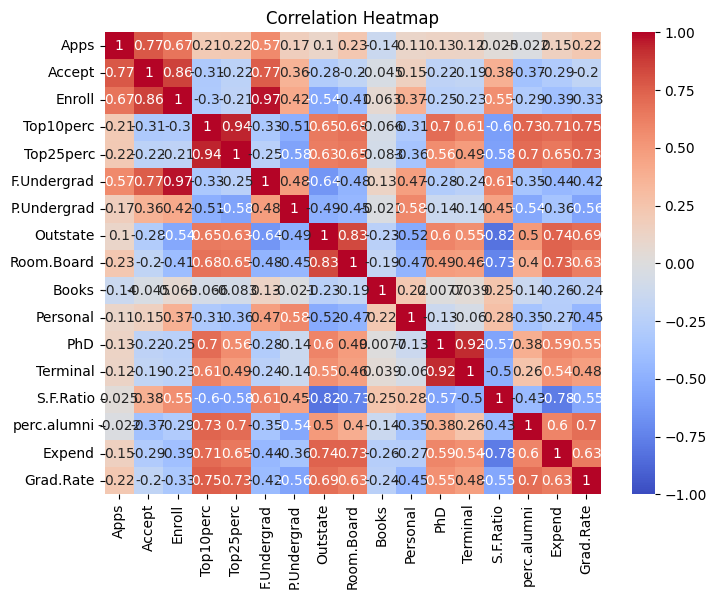

In [30]:
import seaborn as sns

corr_matrix = college_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [31]:
print(corr_matrix)

             Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.00    0.77    0.67       0.21       0.22         0.57   
Accept       0.77    1.00    0.86      -0.31      -0.22         0.77   
Enroll       0.67    0.86    1.00      -0.30      -0.21         0.97   
Top10perc    0.21   -0.31   -0.30       1.00       0.94        -0.33   
Top25perc    0.22   -0.22   -0.21       0.94       1.00        -0.25   
F.Undergrad  0.57    0.77    0.97      -0.33      -0.25         1.00   
P.Undergrad  0.17    0.36    0.42      -0.51      -0.58         0.48   
Outstate     0.10   -0.28   -0.54       0.65       0.63        -0.64   
Room.Board   0.23   -0.20   -0.41       0.68       0.65        -0.48   
Books       -0.14   -0.04    0.06      -0.07      -0.08         0.13   
Personal     0.11    0.15    0.37      -0.31      -0.36         0.47   
PhD          0.13   -0.22   -0.25       0.70       0.56        -0.28   
Terminal     0.12   -0.19   -0.23       0.61       0.49        -

Feature that is most correlated with graduation rate is Top10perc with correlation value of 0.75

In [32]:
college_data.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [34]:
cols = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
subset_data = pd.DataFrame(sc.fit_transform(college_data[cols]), columns = college_data[cols].columns, index = college_data.index)

In [35]:
subset_data.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.20,0.52,0.65,-1.01,-0.93,0.78,0.18,-1.09,-0.70,-0.22,0.47,-0.32,0.05,0.65,-0.51,-0.85,-0.13
1,-0.50,0.10,0.16,-0.67,-0.48,-0.05,-0.55,-1.06,-0.71,-0.22,-0.29,-2.04,-2.16,0.97,0.99,-0.77,0.02
2,2.42,2.35,1.16,-0.24,0.22,0.62,1.00,1.10,1.43,-1.15,-0.72,-0.93,-1.42,-0.21,-0.67,0.12,0.02
3,0.16,0.68,0.65,-1.44,-1.53,0.45,-0.12,-0.88,-1.13,-0.22,0.19,-0.81,-0.24,1.44,-0.82,-0.82,-0.23
4,-0.23,0.11,1.73,-0.13,0.32,2.24,-0.09,-1.81,-0.96,1.70,-0.46,-1.42,-2.16,1.33,1.14,-0.73,-1.94


In [36]:
# Check if PCA using SVD gives same results
from sklearn.decomposition import PCA
# initializing the PCA transformer
pca = PCA(n_components = 2)
# dimensionality reduction:
data_pca = pd.DataFrame(pca.fit_transform(subset_data), index = subset_data.index)
data_pca.head()

,0,1
0,-2.31,0.13
1,-1.94,-1.32
2,-0.72,2.95
3,-3.01,-0.17
4,-3.43,0.33


Text(-2.312242616352031, 0.12698570864437939, '0')

Text(-1.9375537965282041, -1.3226055765463465, '1')

Text(-0.7237403731952937, 2.951358395259624, '2')

Text(-3.012652212893119, -0.17369784777819147, '3')

Text(-3.431982099973631, 0.33310805049196834, '4')

Text(3.5539085208454577, 0.9188933721344458, '5')

Text(-2.1601856297404214, -1.0122210521145723, '6')

Text(2.046725984330878, -0.13485547149783828, '7')

Text(2.410261899498463, -0.9881036985566178, '8')

Text(-1.7792839662821973, -0.6048137893311827, '9')

Text(4.076449359883264, -0.25707407139794514, '10')

Text(-0.1488723943089397, -3.402679096119352, '11')

Text(4.400402542720862, 0.273479770067459, '12')

Text(3.2652022356513055, -1.3194410543959096, '13')

Text(3.7515827683307483, 1.173067817345767, '14')

Text(3.5142191760138544, 0.40976296349050145, '15')

Text(0.03999179797212794, -2.5508416124482665, '16')

Text(-2.132391740367173, -1.2065843031230574, '17')

Text(1.0276822355794086, -0.47759590187353695, '18')

Text(2.670690085833677, 0.33546758929992676, '19')

Text(0.3811692883958183, 0.1538122359774131, '20')

Text(-4.580036903611131, -1.9920466607624692, '21')

Text(4.083384680617269, 1.449513602368278, '22')

Text(4.583120866800019, -1.1195012333058156, '23')

Text(0.5438095900462551, -2.6517474761398314, '24')

Text(-2.857015325128387, 0.36474270539438364, '25')

Text(4.5586024068182835, 0.5407638674040087, '26')

Text(-3.4826686008600825, -0.5344142664790362, '27')

Text(-2.737347727628486, -1.141967915230819, '28')

Text(-3.7596258121647748, 4.6175680898594935, '29')

Text(1.2684684735312628, -1.070891601601815, '30')

Text(-0.5397705741329467, -0.18909103560436194, '31')

Text(-3.184519090397893, 3.759489569991761, '32')

Text(1.9253283081175847, -0.14764264371476604, '33')

Text(0.25767255116202786, 3.439511315939179, '34')

Text(-2.9466438997110598, -0.3678437283407912, '35')

Text(-2.1785306526779173, -2.2295062810802073, '36')

Text(-1.8965698856735016, -0.4025546471197396, '37')

Text(2.2152127019815095, 0.24423951202063635, '38')

Text(-2.556497427223169, -0.8989392306339005, '39')

Text(-2.4570006419099406, -0.46524823362863216, '40')

Text(3.243889209783916, 1.7548259359056666, '41')

Text(-3.4585587844591594, 3.658507859975295, '42')

Text(-2.5425394245209416, 2.00149921786823, '43')

Text(4.402578954298988, 0.924186153321529, '44')

Text(-1.404124058472583, -2.768875303934943, '45')

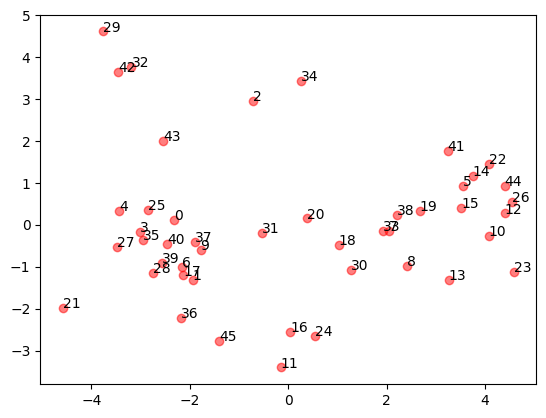

In [38]:
plt.plot(data_pca[0],data_pca[1], 'ro', alpha = 0.5)
for i in range(len(data_pca)):
    plt.text(data_pca.loc[i][0], data_pca.loc[i][1], str(i))
plt.show()

d)ID of the college in the southwest corner of the graph is 21 and the college name is Georgia State University
e)Texas A&M is close to University of Texas at Austin
f)Cornell is far away from the other Ivy League's. Georgia Institue of technology is closer to Syracuse

Question 2

In [63]:
MIT_data = pd.read_csv('MIT_from_islr.csv')
MIT_data.head()

,id,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0,Massachusetts Institute of Technology,Yes,6411,2140,1078,96,99,4481,28,20100,5975,725,1600,99,99,10.10,35,33541,94


In [64]:
MIT_data = MIT_data.drop(columns = ['id','College','Private'])
MIT_data.shape

(1, 17)

In [65]:
MIT_data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
mean,"6,411.00","2,140.00","1,078.00",96.00,99.00,"4,481.00",28.00,"20,100.00","5,975.00",725.00,"1,600.00",99.00,99.00,10.10,35.00,"33,541.00",94.00
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,"6,411.00","2,140.00","1,078.00",96.00,99.00,"4,481.00",28.00,"20,100.00","5,975.00",725.00,"1,600.00",99.00,99.00,10.10,35.00,"33,541.00",94.00
25%,"6,411.00","2,140.00","1,078.00",96.00,99.00,"4,481.00",28.00,"20,100.00","5,975.00",725.00,"1,600.00",99.00,99.00,10.10,35.00,"33,541.00",94.00
50%,"6,411.00","2,140.00","1,078.00",96.00,99.00,"4,481.00",28.00,"20,100.00","5,975.00",725.00,"1,600.00",99.00,99.00,10.10,35.00,"33,541.00",94.00
75%,"6,411.00","2,140.00","1,078.00",96.00,99.00,"4,481.00",28.00,"20,100.00","5,975.00",725.00,"1,600.00",99.00,99.00,10.10,35.00,"33,541.00",94.00
max,"6,411.00","2,140.00","1,078.00",96.00,99.00,"4,481.00",28.00,"20,100.00","5,975.00",725.00,"1,600.00",99.00,99.00,10.10,35.00,"33,541.00",94.00


In [66]:
MIT_data.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [67]:
cols2 = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']

In [68]:
test_data = pd.DataFrame(sc.transform(MIT_data[cols]), columns = MIT_data[cols].columns, index = MIT_data.index)
test_data.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [69]:
test_data

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [70]:
our_pca = pd.DataFrame(pca.transform(test_data), index = test_data.index)
our_pca.head()

,0,1
0,0.00,0.00


Transformed values for MIT in two components are 0, 0

In [72]:
data_pca['dist'] = ((data_pca[0]-our_pca[0].values)**2+(data_pca[1]-our_pca[1].values)**2)**0.5
data_pca

,0,1,dist
0,-2.31,0.13,2.32
1,-1.94,-1.32,2.35
2,-0.72,2.95,3.04
3,-3.01,-0.17,3.02
4,-3.43,0.33,3.45
5,3.55,0.92,3.67
6,-2.16,-1.01,2.39
7,2.05,-0.13,2.05
8,2.41,-0.99,2.60
9,-1.78,-0.60,1.88


In [73]:
data_pca['dist'].min()
np.argmin(data_pca['dist'])

0.41103312561464644

20

Georgia Institute of technology is closest to MIT with a distance of 0.411

Question 3

In [74]:
# Check if PCA using SVD gives same results
from sklearn.decomposition import PCA
# initializing the PCA transformer
pca3 = PCA(n_components = 3)
# dimensionality reduction:
data_pca3 = pd.DataFrame(pca3.fit_transform(subset_data), index = subset_data.index)
data_pca3.head()

,0,1,2
0,-2.31,0.13,0.08
1,-1.94,-1.32,-2.51
2,-0.72,2.95,-2.36
3,-3.01,-0.17,-0.54
4,-3.43,0.33,-1.42


The first two component values did not change when went from K=2 to K=3

In [75]:
our_pca3 = pd.DataFrame(pca3.transform(test_data), index = test_data.index)
our_pca3.head()

,0,1,2
0,0.00,0.00,0.00


In [78]:
data_pca3['dist'] = ((data_pca3[0]-our_pca3[0].values)**2+(data_pca3[1]-our_pca3[1].values)**2+(data_pca3[2]-our_pca3[2].values)**2)**0.5
data_pca3

,0,1,2,dist
0,-2.31,0.13,0.08,2.32
1,-1.94,-1.32,-2.51,3.43
2,-0.72,2.95,-2.36,3.85
3,-3.01,-0.17,-0.54,3.07
4,-3.43,0.33,-1.42,3.73
5,3.55,0.92,0.67,3.73
6,-2.16,-1.01,-1.00,2.59
7,2.05,-0.13,-0.84,2.22
8,2.41,-0.99,0.64,2.68
9,-1.78,-0.60,-0.10,1.88


In [79]:
data_pca3['dist'].min()
np.argmin(data_pca3['dist'])

0.4792464633839225

20

b)Georgia Institute of Technology is closed to MIT
c)Closest school is 0.479 far from MIT
d) PCA is an unsupersvised technoque like knn but PCA also be used for visualising and feature transformation. It transforms high dimensional data to low dimensional data and helps user understand better with the help of visualising